In [134]:
import yaml
import preprocessing
import os
import fnmatch
from hmmlearn.hmm import GMMHMM
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [135]:
def prepare_data(id,n_mfcc, dataset_dir):
    file_paths = []
    data = []
    
    file_pattern = f"*{id}.wav"
    for root, _, files in os.walk(os.path.join(dataset_dir)):
        for file in files:
            if fnmatch.fnmatch(file.lower(), file_pattern.lower()):
                file_paths.append(os.path.join(root, file))
    
    class_data = [preprocessing.get_mfcc(file_path, n_mfcc) for file_path in file_paths]
    data.extend(class_data)
    return data

In [167]:
def train(data, n_state, n_mix): 
    start_prob = np.full(n_state, 0.0)
    start_prob[0] = 1.0
    trans_matrix = np.full((n_state, n_state), 0.0)
    p = 0.5
    np.fill_diagonal(trans_matrix, p)
    np.fill_diagonal(trans_matrix[0:, 1:], 1 - p)
    trans_matrix[-1, -1] = 1.0
    
    model = GMMHMM(
                n_components=n_state,    
                n_mix=n_mix,                         
                verbose=False,
                n_iter=300,
                startprob_prior=start_prob,
                transmat_prior=trans_matrix,
                params='stmc',
                init_params='mc',
                random_state=42
            )
    model.fit(X=np.vstack(data),lengths=[x.shape[0] for x in data])
    
    return model

In [168]:
def save_log(log_dir, id, n_state, n_mix, n_mfcc, model):
    os.makedirs(os.path.join(log_dir, id), exist_ok=True)
    
    log_file_path = os.path.join(log_dir, id, f"{id}_{n_state}{n_mix}{n_mfcc}.log")
    with open(log_file_path, 'w') as log_file:
        log_file.write(str(model.monitor_.history))

In [169]:
def save_model(model_path, id, n_state, n_mix, n_mfcc, model):
    os.makedirs(os.path.join(model_path, id), exist_ok=True)
    
    name = f'{model_path}/{id}/{id}_{n_state}{n_mix}{n_mfcc}.pkl'
    with open(name, 'wb') as file:
        pickle.dump(model, file)

In [172]:
dataset_path = 'data'
model_path = 'models'
train_dir = 'train'
test_dir = 'test'
log_dir = 'logs'

In [171]:
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

print(config)

for key, value in config.items():
    for n_mfcc in value['n_mfcc']:
        for n_state in value['n_state']:
            for n_mix in value['n_mix']:
                data = prepare_data(id=key, n_mfcc=n_mfcc, dataset_dir=os.path.join(dataset_path, train_dir))
                model = train(data=data, n_state=n_state, n_mix=n_mix)
                save_model(model_path=model_path, id=key, n_state=n_state, n_mix=n_mix, n_mfcc=n_mfcc, model=model)
                save_log(log_dir=log_dir, id=key, n_state=n_state, n_mix=n_mix, n_mfcc=n_mfcc, model=model)

{'01': {'name': 'chủ', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '02': {'name': 'về', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '03': {'name': 'vào', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '04': {'name': 'tải', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '05': {'name': 'đầu', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '06': {'name': 'cuối', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '07': {'name': 'kế', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '08': {'name': 'trước', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '09': {'name': 'dừng', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '10': {'name': 'ngưng', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '11': {'name': 'đọc', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': [13]}, '13': {'name': 'tiếp', 'n_state': [4, 

Model is not converging.  Current: -288578.352123678 is not greater than -288575.10878389614. Delta is -3.2433397818822414
Model is not converging.  Current: -282510.4372055668 is not greater than -282460.4836738936. Delta is -49.95353167317808
Model is not converging.  Current: -279017.01272482076 is not greater than -278997.231175748. Delta is -19.78154907276621
Model is not converging.  Current: -280201.49008179124 is not greater than -280171.26910636737. Delta is -30.220975423872005
Model is not converging.  Current: -279011.5831078965 is not greater than -279003.8527661493. Delta is -7.730341747170314
Model is not converging.  Current: -277561.415655708 is not greater than -277554.38987978507. Delta is -7.0257759229280055
Model is not converging.  Current: -268179.37991378433 is not greater than -268178.519911872. Delta is -0.8600019123405218
Model is not converging.  Current: -270490.1447745572 is not greater than -270489.7714745192. Delta is -0.37330003798706457
Model is not con

KeyboardInterrupt: 

In [ ]:
# from sklearn.model_selection import KFold
# import numpy as np

# # Define number of folds
# k_folds = 5

# # Main loop for training models
# for key, value in config.items():
#     # Prepare data and labels
#     data = prepare_data(id=key, n_mfcc=value['n_mfcc'], dataset_dir=os.path.join(dataset_path, train_dir))
    
#     # Initialize K-Fold
#     kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
#     fold = 1
    
#     for train_index, val_index in kf.split(data):
#         print(f"Training fold {fold}/{k_folds} for ID: {key}")
        
#         # Split data into training and validation sets
#         train_data = [data[i] for i in train_index]
#         val_data = [data[i] for i in val_index]
        
#         # Train the model on training data
#         model = train(data=train_data, n_state=value['n_state'], n_mix=value['n_mix'])
        
#         # Optionally, evaluate the model on validation data (if evaluation metric is needed)
#         # For example, log-likelihood can be used as an evaluation metric
#         log_likelihoods = [model.score(x) for x in val_data]
#         print(f"Validation log-likelihood for fold {fold}: {np.mean(log_likelihoods):.2f}")
        
#         # Save model and logs for this fold
#         save_model(f"{model_path}/fold_{fold}", key, model)
#         save_log(f"{log_dir}/fold_{fold}", key, model)
        
#         fold += 1

Training fold 1/5 for ID: 01
Validation log-likelihood for fold 1: -11570.48
Training fold 2/5 for ID: 01
Validation log-likelihood for fold 2: -16746.24
Training fold 3/5 for ID: 01
Validation log-likelihood for fold 3: -13467.22
Training fold 4/5 for ID: 01
Validation log-likelihood for fold 4: -14838.57
Training fold 5/5 for ID: 01
Validation log-likelihood for fold 5: -16570.21
Training fold 1/5 for ID: 02
Validation log-likelihood for fold 1: -12346.66
Training fold 2/5 for ID: 02
Validation log-likelihood for fold 2: -14366.81
Training fold 3/5 for ID: 02
Validation log-likelihood for fold 3: -14560.66
Training fold 4/5 for ID: 02
Validation log-likelihood for fold 4: -15995.41
Training fold 5/5 for ID: 02
Validation log-likelihood for fold 5: -13218.62
Training fold 1/5 for ID: 03
Validation log-likelihood for fold 1: -12455.83
Training fold 2/5 for ID: 03
Validation log-likelihood for fold 2: -14404.43
Training fold 3/5 for ID: 03
Validation log-likelihood for fold 3: -15989.22

Model is not converging.  Current: -227154.37950394335 is not greater than -227150.7687193511. Delta is -3.6107845922524575


Validation log-likelihood for fold 1: -11669.16
Training fold 2/5 for ID: 10
Validation log-likelihood for fold 2: -14576.75
Training fold 3/5 for ID: 10
Validation log-likelihood for fold 3: -14940.46
Training fold 4/5 for ID: 10
Validation log-likelihood for fold 4: -14870.79
Training fold 5/5 for ID: 10
Validation log-likelihood for fold 5: -13266.92
Training fold 1/5 for ID: 11
Validation log-likelihood for fold 1: -12712.35
Training fold 2/5 for ID: 11
Validation log-likelihood for fold 2: -14432.14
Training fold 3/5 for ID: 11
Validation log-likelihood for fold 3: -15002.88
Training fold 4/5 for ID: 11
Validation log-likelihood for fold 4: -14948.89
Training fold 5/5 for ID: 11
Validation log-likelihood for fold 5: -12751.61
Training fold 1/5 for ID: 13
Validation log-likelihood for fold 1: -13072.95
Training fold 2/5 for ID: 13


Degenerate mixture covariance
Degenerate mixture covariance
Degenerate mixture covariance
Degenerate mixture covariance


Validation log-likelihood for fold 2: -15592.90
Training fold 3/5 for ID: 13
Validation log-likelihood for fold 3: -14734.90
Training fold 4/5 for ID: 13
Validation log-likelihood for fold 4: -15989.11
Training fold 5/5 for ID: 13
Validation log-likelihood for fold 5: -13847.02
Training fold 1/5 for ID: 12
Validation log-likelihood for fold 1: -12221.74
Training fold 2/5 for ID: 12
Validation log-likelihood for fold 2: -13684.01
Training fold 3/5 for ID: 12
Validation log-likelihood for fold 3: -14395.10
Training fold 4/5 for ID: 12
Validation log-likelihood for fold 4: -14127.53
Training fold 5/5 for ID: 12
Validation log-likelihood for fold 5: -12623.55
Training fold 1/5 for ID: 14
Validation log-likelihood for fold 1: -13322.39
Training fold 2/5 for ID: 14
Validation log-likelihood for fold 2: -15865.20
Training fold 3/5 for ID: 14
Validation log-likelihood for fold 3: -15336.87
Training fold 4/5 for ID: 14
Validation log-likelihood for fold 4: -15993.06
Training fold 5/5 for ID: 14

KeyboardInterrupt: 

In [173]:
def load_model(model_path, id):
    with open(f'{model_path}/{id}.pkl', 'rb') as file:
        model = pickle.load(file)
    return model

In [174]:
def load_all_models(model_path):
    models = {}
    for file in os.listdir(model_path):
        if file.endswith(".pkl"):
            id = file.split(".")[0]
            model = load_model(model_path, id)
            models[id] = model
    return models

{'01': {'name': 'chủ', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '02': {'name': 'về', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '03': {'name': 'vào', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '04': {'name': 'tải', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '05': {'name': 'đầu', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '06': {'name': 'cuối', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '07': {'name': 'kế', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '08': {'name': 'trước', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '09': {'name': 'dừng', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '10': {'name': 'ngưng', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '11': {'name': 'đọc', 'n_state': [4, 5, 6, 7], 'n_mix': [2, 3, 4, 5], 'n_mfcc': 13}, '13': {'name': 'tiếp', 'n_state': [4, 5, 6, 7], 'n_mix': [2,

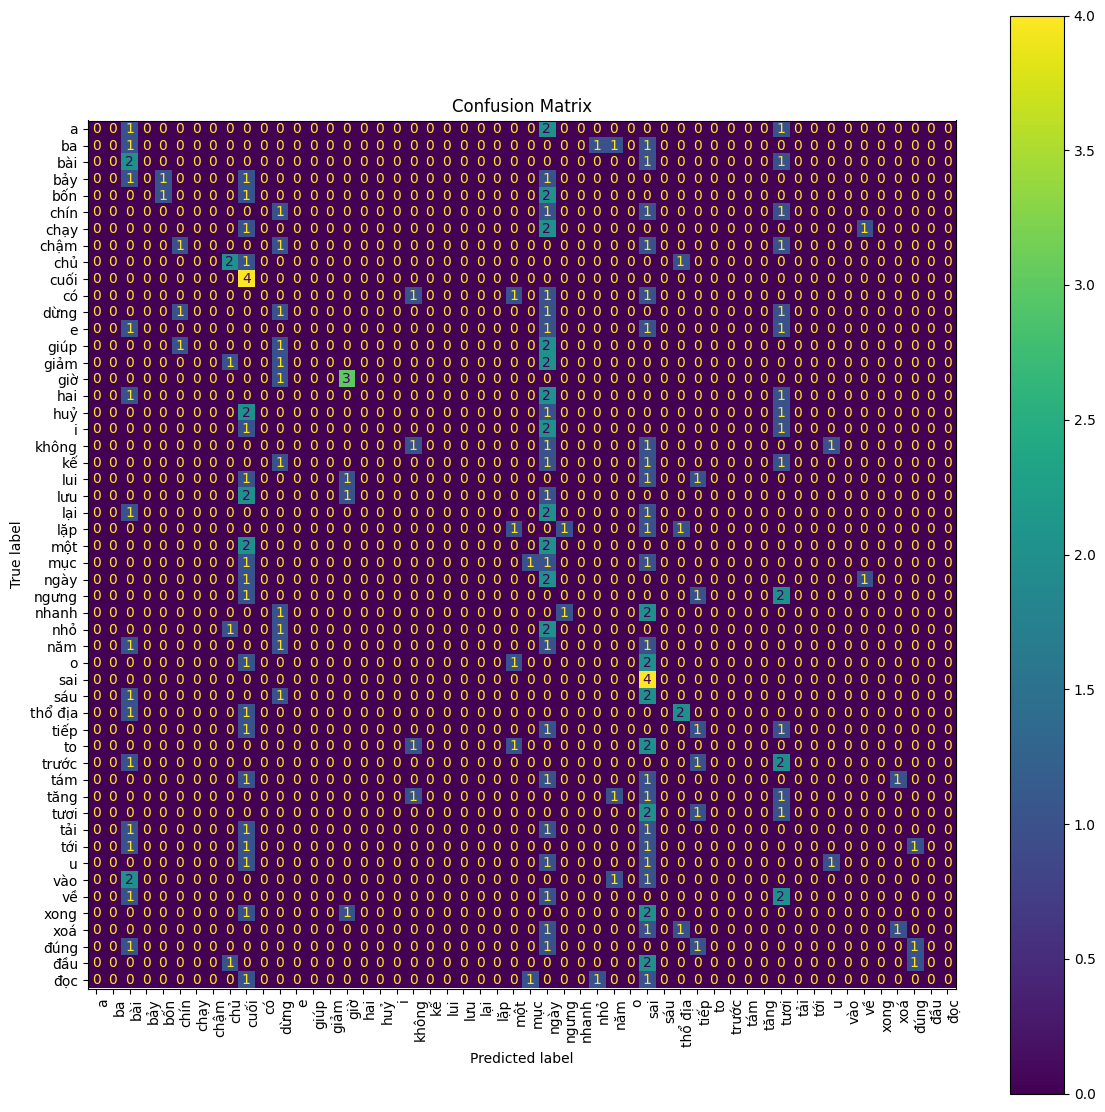

{'chủ': 0.5,
 'về': 0.0,
 'vào': 0.0,
 'tải': 0.0,
 'đầu': 0.0,
 'cuối': 1.0,
 'kế': 0.0,
 'trước': 0.0,
 'dừng': 0.25,
 'ngưng': 0.0,
 'đọc': 0.0,
 'tiếp': 0.25,
 'lui': 0.0,
 'tới': 0.0,
 'tăng': 0.0,
 'to': 0.0,
 'giảm': 0.0,
 'nhỏ': 0.0,
 'lại': 0.0,
 'lặp': 0.0,
 'nhanh': 0.0,
 'chậm': 0.0,
 'lưu': 0.0,
 'xoá': 0.25,
 'huỷ': 0.0,
 'chạy': 0.0,
 'xong': 0.0,
 'đúng': 0.25,
 'sai': 1.0,
 'giúp': 0.0,
 'giờ': 0.75,
 'ngày': 0.5,
 'tươi': 0.25,
 'có': 0.0,
 'không': 0.25,
 'mục': 0.25,
 'bài': 0.5,
 'một': 0.0,
 'hai': 0.0,
 'ba': 0.0,
 'bốn': 0.25,
 'năm': 0.0,
 'sáu': 0.0,
 'bảy': 0.0,
 'tám': 0.0,
 'chín': 0.0,
 'a': 0.0,
 'e': 0.0,
 'i': 0.0,
 'o': 0.0,
 'u': 0.25,
 'thổ địa': 0.5}

In [179]:
with open("config.yaml", "r") as file:
    config = yaml.safe_load(file)

print(config)

def evaluation(config):
    all_y_true = []
    all_y_pred = []
    models = load_all_models(model_path)
    all_accuracy = {}
    
    index_to_name = {index: value['name'] for index, (key, value) in enumerate(config.items())}

    for key, value in config.items():
        y_true = []
        y_pred = []
        
        test_data = prepare_data(key, value['n_mfcc'], os.path.join(dataset_path, test_dir))
        test_labels = [value['name']] * len(test_data)  # Generate labels based on the length of test_data
        
        for data, label in zip(test_data, test_labels):
            scores = [models[key].score(data) for key, value in config.items()]
            pred = np.argmax(scores)
            y_pred.append(index_to_name[pred])
            y_true.append(label)
        
        accuracy = (np.array(y_true) == np.array(y_pred)).sum() / len(y_true)
        
        all_accuracy[value['name']] = accuracy
        all_y_true.extend(y_true)
        all_y_pred.extend(y_pred)

    # Calculate confusion matrix using all accumulated true and predicted values
    fig, ax = plt.subplots(figsize=(14,14))
    ax.set(title='Confusion Matrix')
    # display_labels = [value['name'] for key, value in config.items()]
    display_labels = sorted(set(all_y_true + all_y_pred))
    print(all_y_true)
    print(all_y_pred)
    print(display_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(all_y_true, all_y_pred), display_labels=display_labels)
    disp.plot(ax=ax)

    # Rotate the horizontal labels by 90 degrees
    plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

    plt.show()
    return all_accuracy

# Assuming class_names is defined
evaluation(config)

In [ ]:

best_n_mfcc = None
best_number_of_states = None
best_n_mix = None

n_mfcc = 4
# for n_mfcc in range(13, 20): 
for number_of_states in range(2, 7):
    for n_mix in range(1, 6): 
        print(f"n_mfcc: {n_mfcc}, number_of_states: {number_of_states}, n_mix: {n_mix}")
        try:
            for class_name in class_names:
                data, labels = prepare_train_data(class_names.index(class_name), class_name, n_mfcc)
                model = train(class_name, data, number_of_states, n_mix, 300)
                save_model(class_name, model)
            all_accuracy = evaluation(class_names, n_mfcc)
        except Exception as e:
            print(f"Error during training for n_mfcc: {n_mfcc}, number_of_states: {number_of_states}, n_mix: {n_mix}, error: {e}")
            continue